## **<u>DSCI 100 GROUP 3 PROJECT REPORT</u>**

## **Using classification and clustering strategies to model and analyze the degree at which various factors impact user knowledge**

By: Jaia Manhas, Jiarong Cui, Tejasvi Kathuria and Yitong Zhang

<img src=https://www.avepoint.com/blog/wp-content/uploads/2020/03/businessman-on-blurred-background-using-digital-artificial-icon-3d-picture-id1197563732.jpg width="1500">

Source: https://www.avepoint.com/blog/office-365/knowledge-management-office-365

## **<u>INTRODUCTION</u>**

### **Background information**

Our knowledge levels are increasing in volume, velocity and variety day to day as we learn more about the processes and technologies around us (Liao et al., 2021). User knowledge is a relevant field of research in data science that allows us to understand a user’s knowledge state and gain from interactions with a particular piece of technology or content relating to a specific subject. By understanding user knowledge and the factors that impact it, analysts can determine how to meet learning needs more effectively within the world of technology and education. Although various data modelling and visualizing strategies can be used to approach user knowledge inquiries (Liao et al., 2021), we will be using the K-nearest neighbours algorithm, KNN (classification).

### **Our question**

Through modelling and analyzing factors that impact user knowledge, which factors can be used to most accurately predict knowledge levels of users through classification?

### **Dataset being used**

Our project uses the User Knowledge dataset (Kahraman et al., 2013), which provides information about students’ knowledge status of Electrical DC Machines (UNS).

The 5 columns (attributes) recorded in the User Knowledge dataset can be divided into two groups:

1.	Study time degree (STG), repetition number degree (SCG) and exam performance (PEG) as related directly to course materials.
2.	Study time degree (STR) and exam performance (LPR) as related to beyond course (supplementary) materials.

The dataset (Kahraman et al., 2013) also provides information on class distribution.

The dataset can be accessed at: https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling.

## **<u>METHODS AND RESULTS</u>**

After reading the data into R and ensuring it was in a tidy format (properly split into training and testing data), we explored the data by looking at the average and percentage distribution of each attribute and the mean of the total observation count. We proceeded to visualize the observation counts at each knowledge level (comparing these counts to our total observation count mean). This exploration helped us understand the distribution and trends present in the User Knowledge dataset (Kahraman et al., 2013).

Next, we created scatterplots of attribute pairings to visualize their relationships and determine which attributes impact UNS the most. Using ggpairs to comparatively view the scatterplots, we then chose attributes PEG and LPR (both related to user exam performance) to later include in our model’s recipe. Although we initially thought attributes related directly to course materials would be the most useful attributes for prediction, we realized that PEG and LPR were nicely correlated and would provide a solid foundation for our model.

Our next step was to create a model using KNN (classification). After creating a recipe that was standardized (centered and scaled), we visualized our accuracy estimate per number of neighbours. From here, we trained and fit our model with the correct K value for our analysis; the workflow we obtained identified our best K as 5. With our chosen K as 5, we used testing data (that was previously set aside) to verify our model and test our chosen attributes, PEG and LPR. In verifying our model, we used our model to make test predictions, which were then evaluated by a confusion matrix that reported on the accuracy of our classifier.

Lastly, we visualized our end results by creating a table and figure to illustrate the confusion matrix obtained earlier. Our figure uses different colours and transparency to demonstrate proportional outcomes within reference groups.

## **<u>Preliminary Exploratory Data Analysis</u>**

### **Reading our dataset from the web into R**

In [2]:
# Import packages
library(tidyverse)
library(readxl)
library(repr)
library(tidymodels)                                    
library("data.table")  
library(GGally)
options(repr.matrix.max.rows = 6)

# Set the seed
set.seed(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### **Cleaning and wrangling our data into a tidy format**

The User Knowledge dataset is split into training and testing data. Our first step is to extract the training data.

### **Summarizing the data**

**Table 1:** Training data.

In [3]:
# url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
# file <- download.file(url, 'data/completeData.xls')
# train <- read_excel('data/completeData.xls', sheet='Training_Data')
# train

In [4]:
url <- "https://github.com/YitongZhang01/DSCI100_Group_Project/blob/main/data/Training_data.xls?raw=true"
file <- download.file(url, 'data/training_data.xls')
train <- read_excel('data/training_data.xls') %>% mutate(Class = as_factor(UNS))
# data <- read_xls(path = 'Group_project/DSCI100_Group_Project/data/training_test.xls')
# data <- read_excel('Group_project/DSCI100_Group_Project/data/training.xls')

# train <- read_excel(url) %>% mutate(Class = as_factor(UNS))

In [5]:
train

STG,SCG,STR,LPR,PEG,UNS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low,very_low
0.08,0.08,0.10,0.24,0.90,High,High
0.06,0.06,0.05,0.25,0.33,Low,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,High
0.50,0.75,0.81,0.61,0.26,Middle,Middle
0.66,0.90,0.76,0.87,0.74,High,High


**Table 2:** Averages of each attribute.

In [6]:
# Calculate the average for each attribute
train_avg<- summarize(train, 
        across(STG:PEG,mean))
train_avg

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


**Table 3:** Percentage distribution from high to low for each attribute of UNS.

In [7]:
# Explore data
num_obs <- nrow(train)
train_exp <- train %>%
  group_by(Class) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100,
    mean = num_obs/4
  )%>%
arrange(by=desc(percentage))
train_exp

`summarise()` ungrouping output (override with `.groups` argument)



Class,count,percentage,mean
<fct>,<int>,<dbl>,<dbl>
Middle,88,34.108527,64.5
Low,83,32.170543,64.5
High,63,24.418605,64.5
very_low,24,9.302326,64.5


### **Visualizing the data**

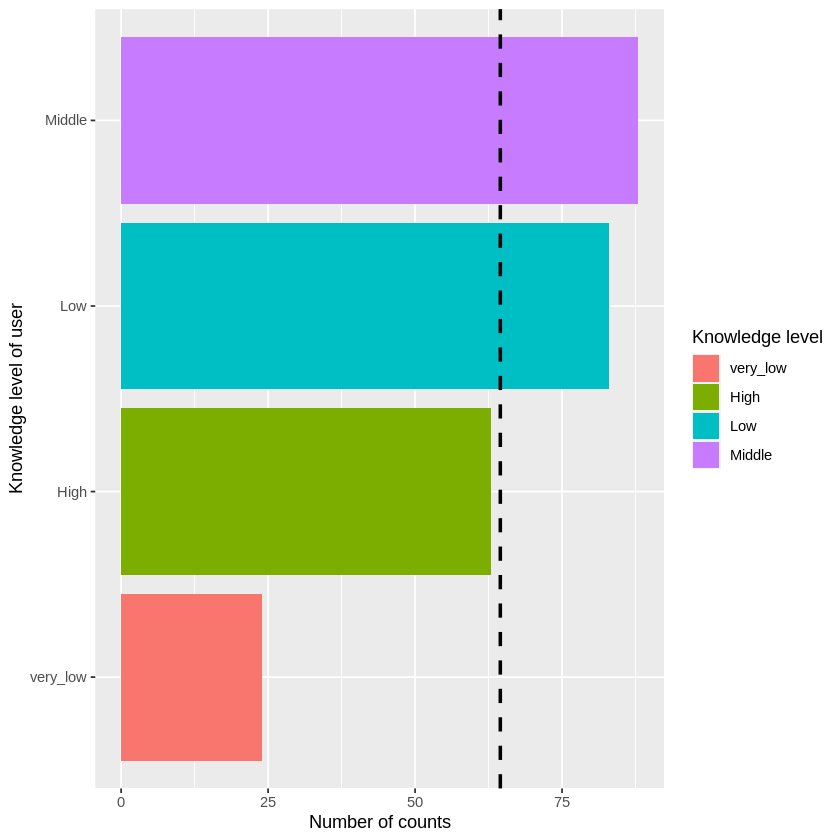

In [8]:
# Visualize observation counts at each knowledge level of user and indicate the mean of 64.5
UNS_bar <- ggplot(train_exp, aes(x = count, y = Class,fill = Class)) +
  geom_bar(stat = "identity") +
  labs(x= "Number of counts", y= "Knowledge level of user", fill="Knowledge level")+
  geom_vline(xintercept = 64.5, linetype = "dashed", size = 1)
UNS_bar

**Figure 1:** Bar graph displaying observation counts at each knowledge level of user. The total observation count mean of 64.5 is represented by a dashed line.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



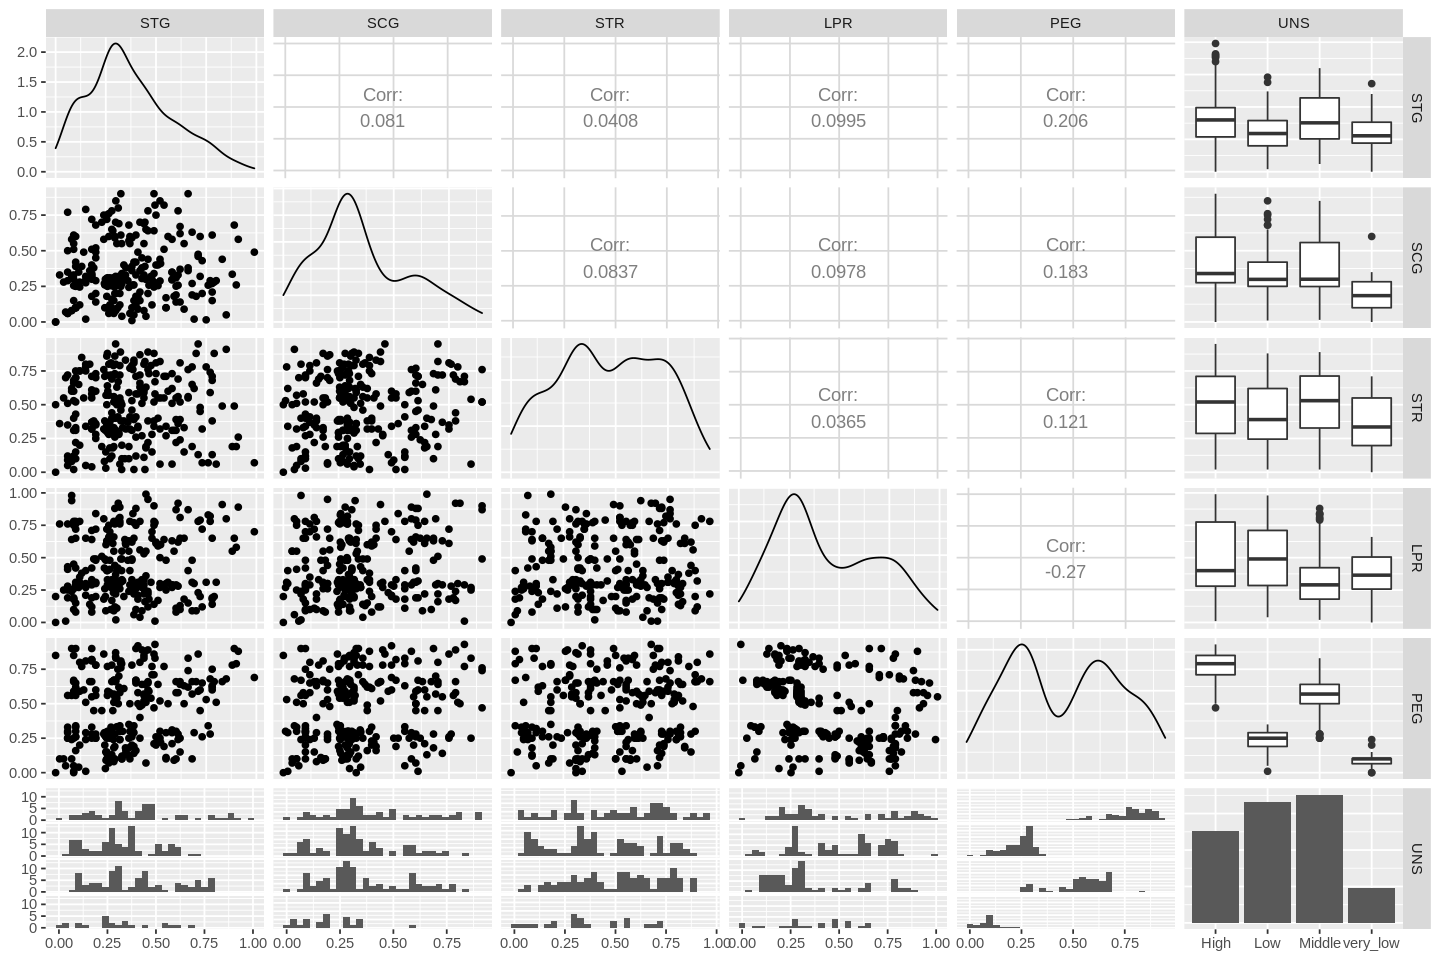

In [9]:
# Use ggpairs to comparatively view scatterplots displaying attribution pairings
options(repr.plot.width = 12, repr.plot.height = 8)

train_eda <- train %>%  
    ggpairs(column =1:6)
train_eda 

**Figure 2:** A comparative view of scatterplots that display different attribute pairings.

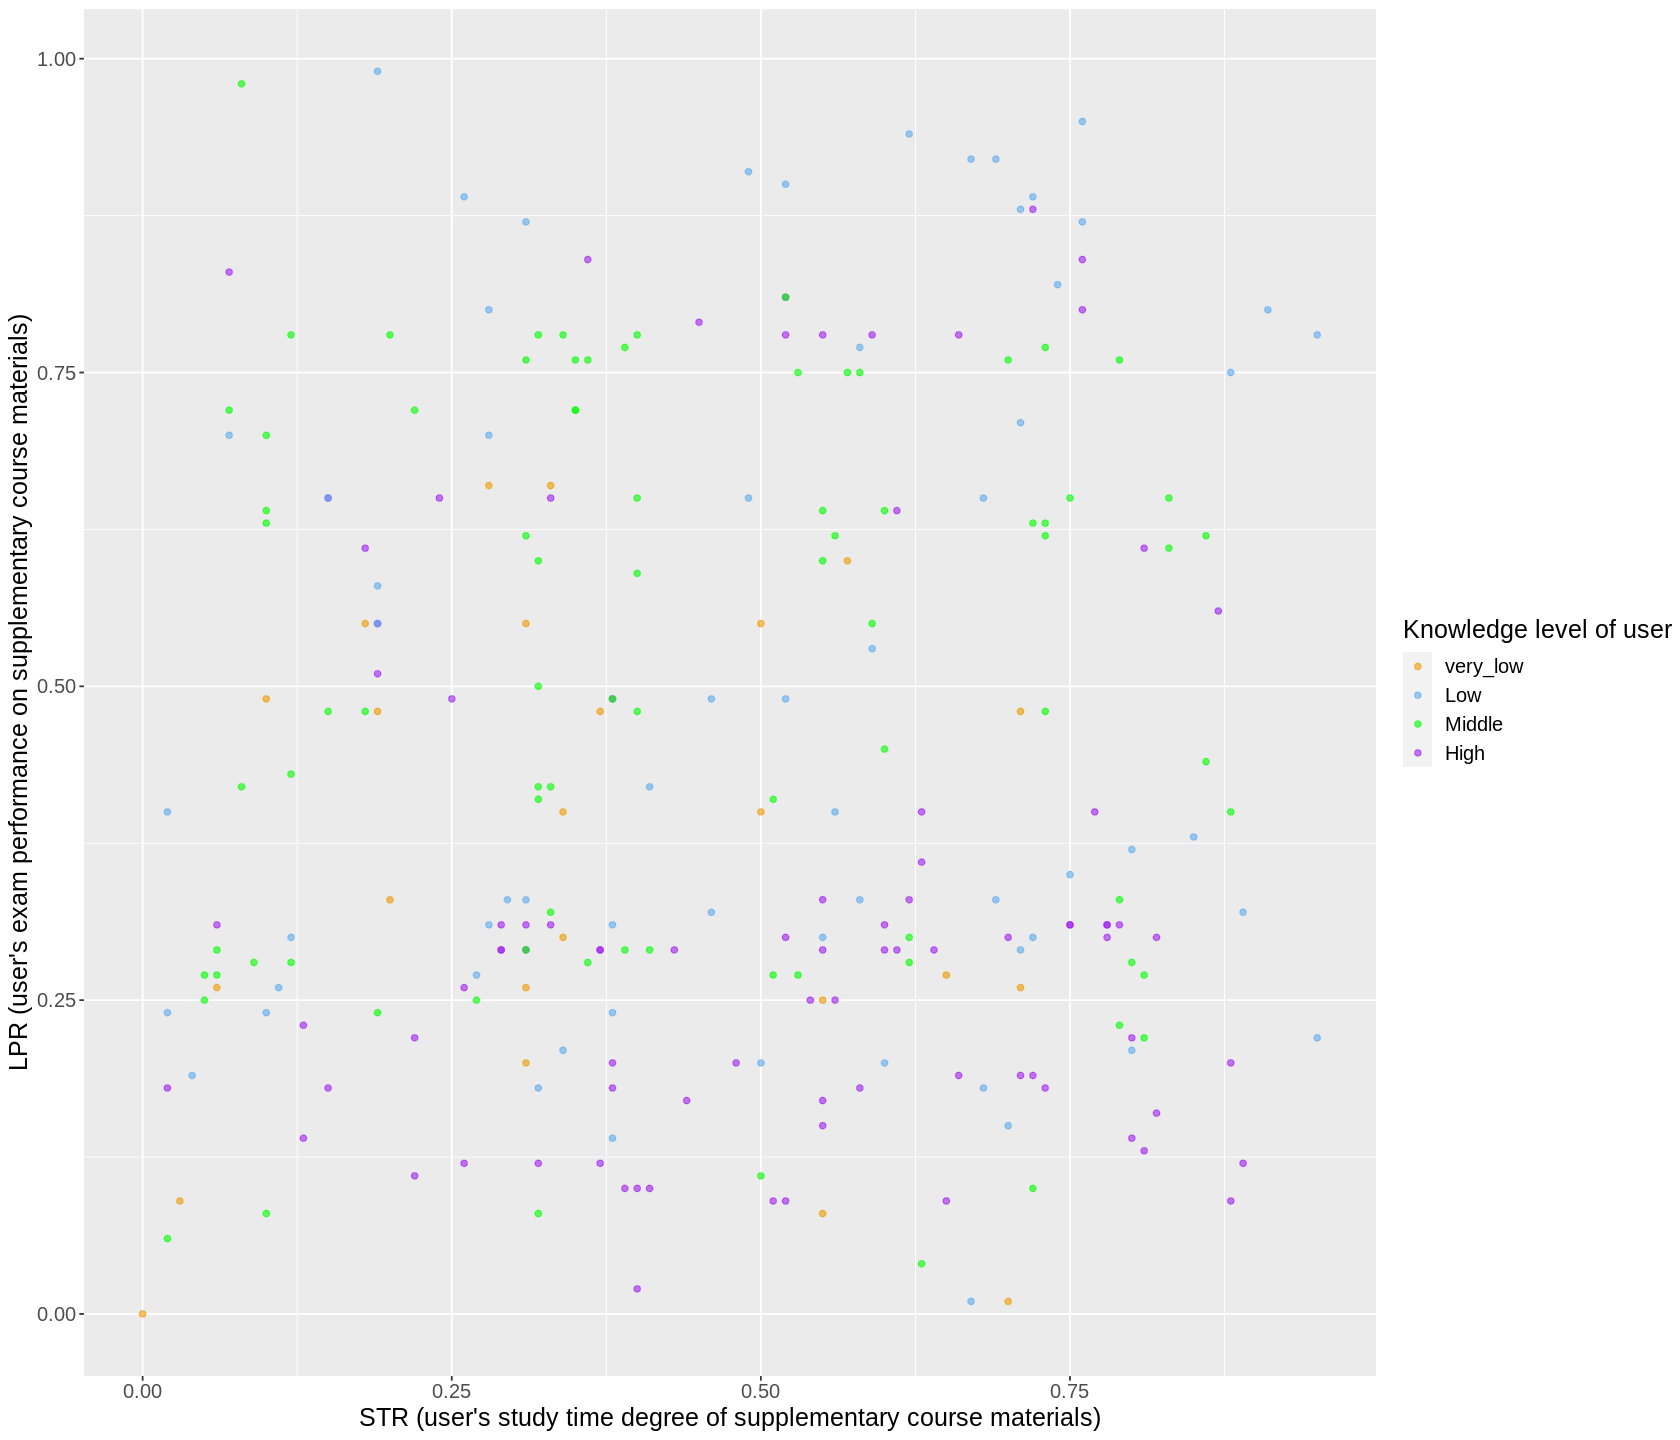

In [21]:
# Scatterplot of attributes LPR and STR
options(repr.plot.width = 14, repr.plot.height = 12)

perim_concav <- train %>%
  ggplot(aes( x= STR, y = LPR, color = Class)) +
  geom_point(alpha = 0.6) +
  labs(x = "STR (user's study time degree of supplementary course materials)", 
       y = "LPR (user's exam performance on supplementary course materials)",
       color = "Knowledge level of user") +
  scale_color_manual(labels = c("very_low","Low", "Middle","High"), 
                     values = c("orange2", "steelblue2","green","purple")) +
  theme(text = element_text(size = 15))
perim_concav

**Figure 3:** Scatterplot of the relationship between LPR and STR; relationship is unclear.

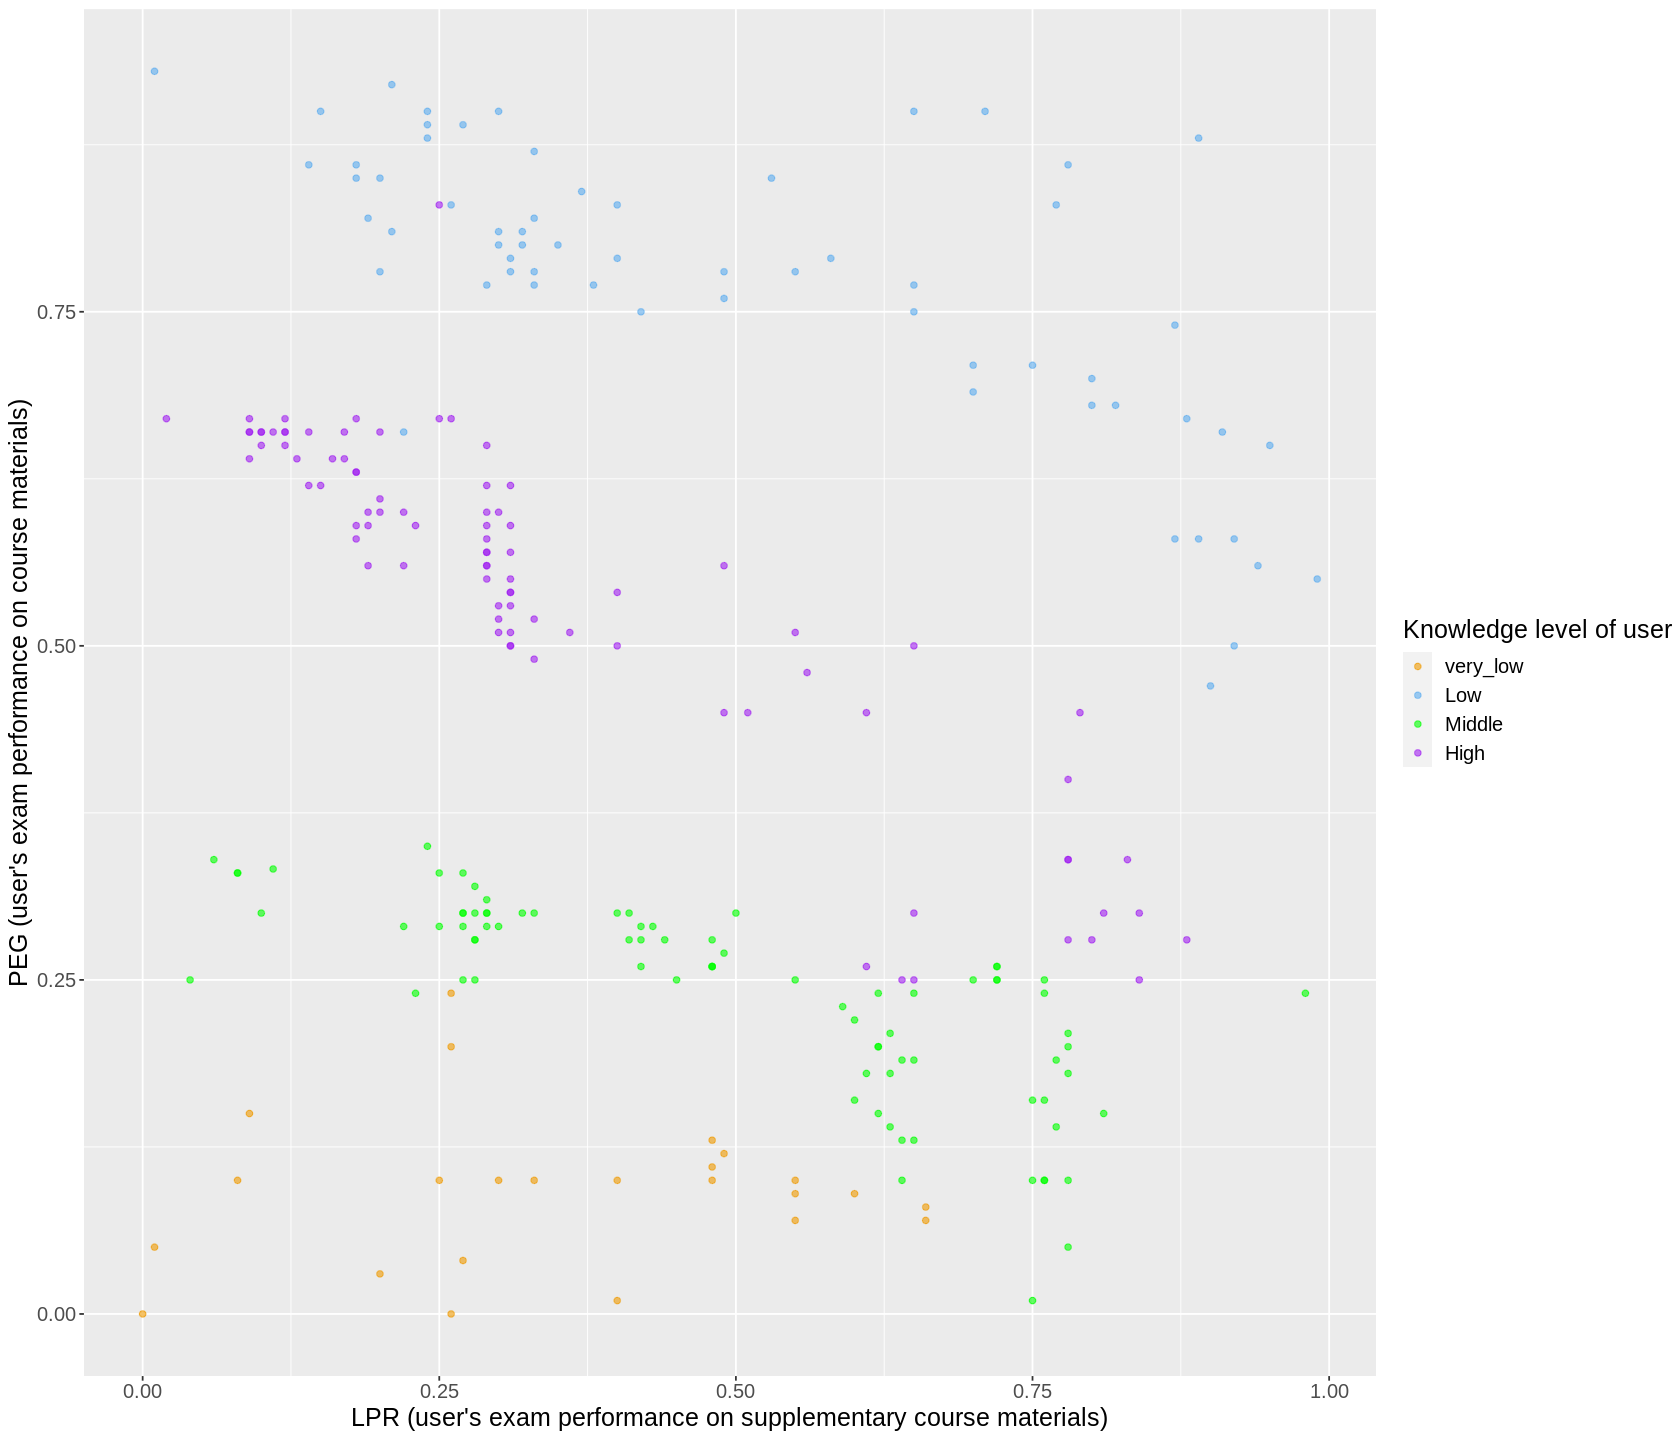

In [11]:
# Scatterplot of attributes PEG and LPR
options(repr.plot.width = 14, repr.plot.height = 12)

perim_concav_2 <- train %>%
  ggplot(aes(x = LPR, y = PEG, color = Class)) +
  geom_point(alpha = 0.6) +
  labs(x = "LPR (user's exam performance on supplementary course materials)", 
       y = "PEG (user's exam performance on course materials)",
       color = "Knowledge level of user") +
  scale_color_manual(labels = c("very_low","Low", "Middle","High"), 
                     values = c("orange2", "steelblue2","green","purple")) +
  theme(text = element_text(size = 15))
perim_concav_2

**Figure 4:** Scatterplot of the relationship between PEG and LPR; relationship is clear and we see that the data points are in cluster formation.

## **<u>Data Analysis</u>**

### **Performing our analysis**

**Table 4:** Our defined model. It was made by creating a recipe and standardizing it so all variables in the data set have a mean of 0 and a standard deviation of 1.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9613674,5,0.005864803,Model01
2,accuracy,multiclass,0.9613674,5,0.005864803,Model02
3,accuracy,multiclass,0.9498986,5,0.007158801,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,multiclass,0.9536722,5,0.007295183,Model08
9,accuracy,multiclass,0.9496722,5,0.007520912,Model09
10,accuracy,multiclass,0.9496722,5,0.007520912,Model10


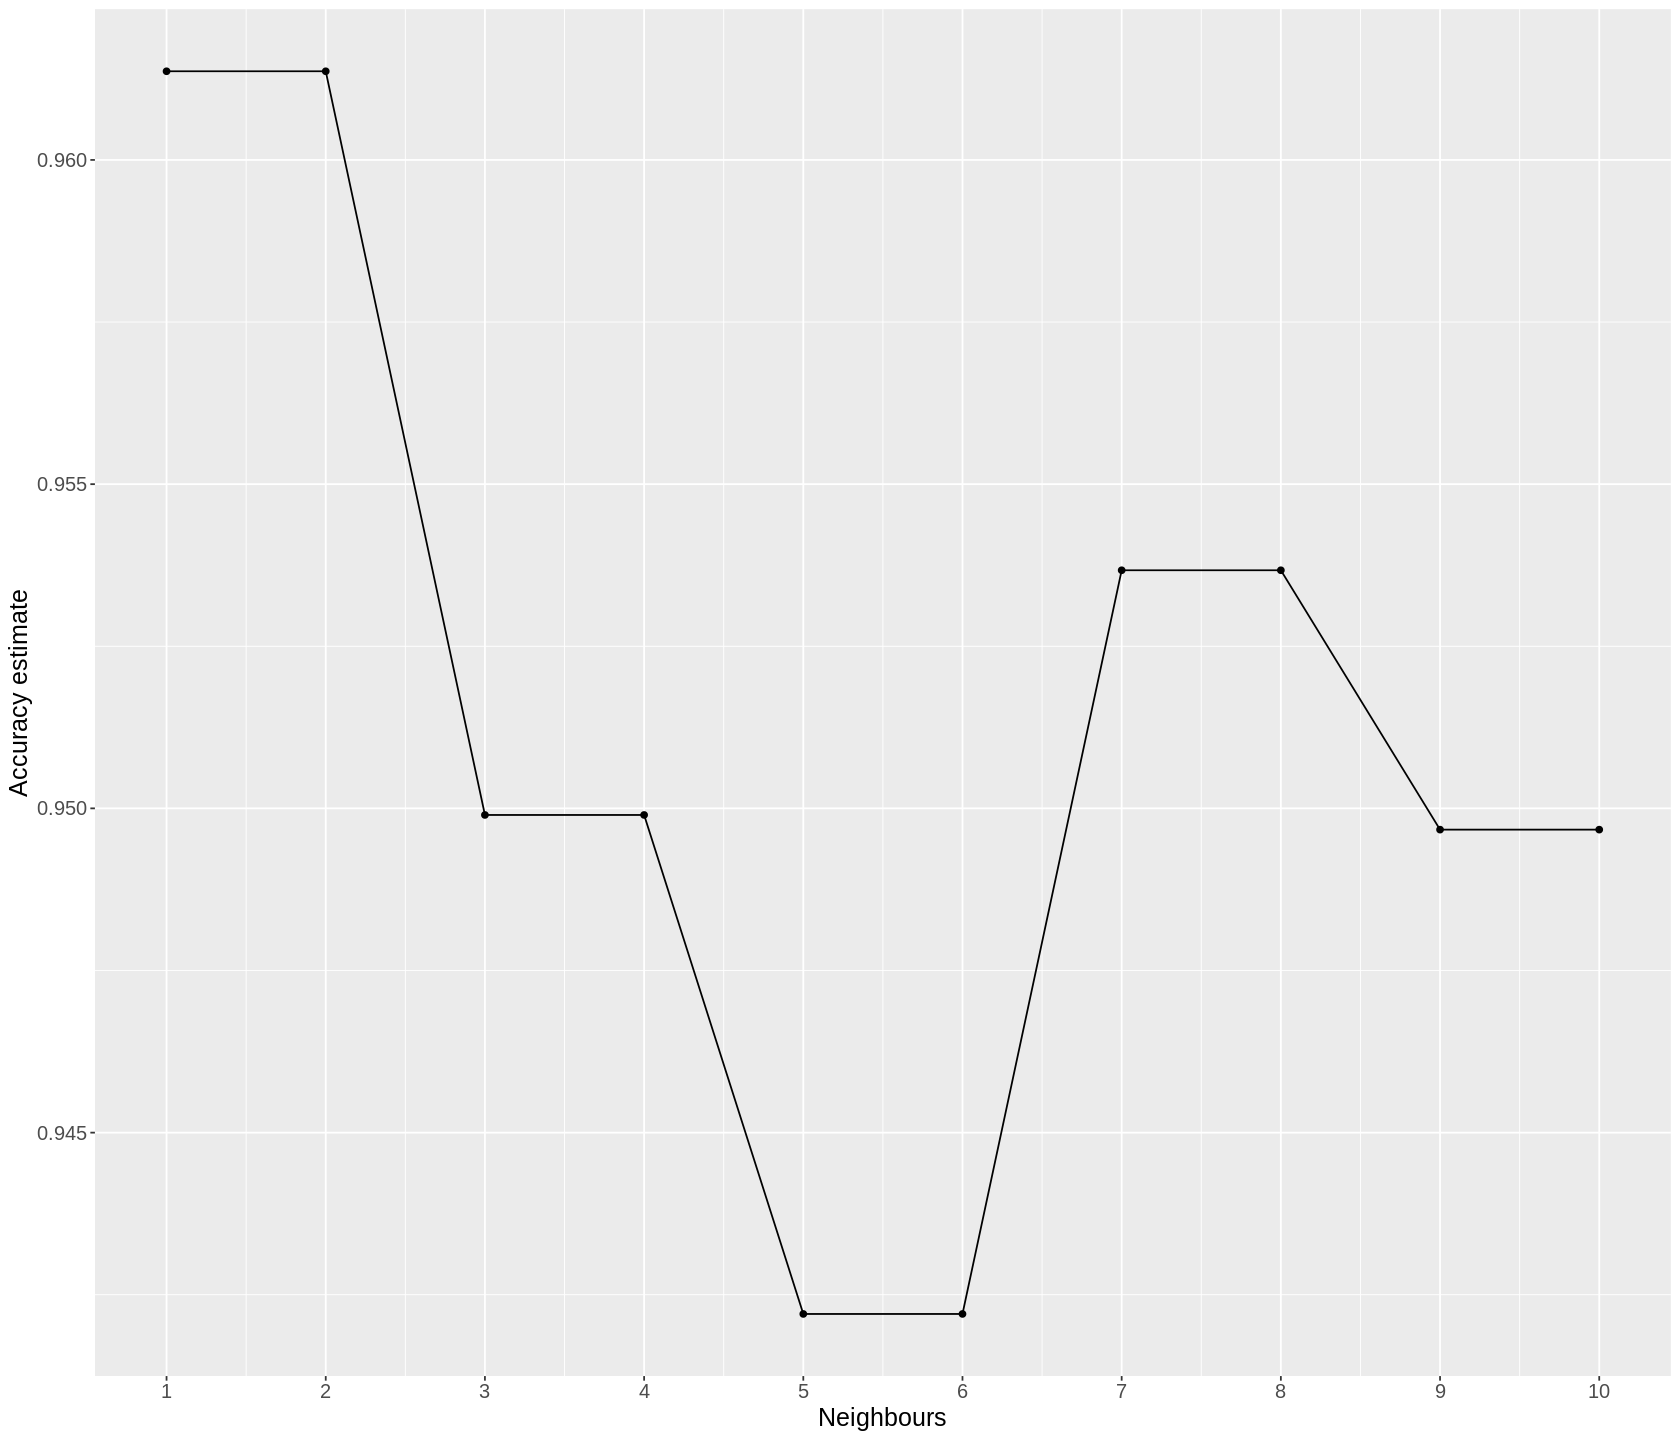

In [12]:
# Create recipe and standardize it so all attributes have a mean of 0 and a standard deviation of 1
data_recipe<- recipe(Class ~ LPR + PEG , data = train) %>%
                       step_scale(all_predictors()) %>%
                       step_center(all_predictors())

# Define the model
ks <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

data_vfold <- vfold_cv(train, v = 5, strata = Class)

results <- workflow() %>%
  add_recipe(data_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = data_vfold, grid = ks) %>%
  collect_metrics()

accuracies <- results %>%
  filter(.metric == "accuracy")
accuracies 

# Visualize the accuracy
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbours", y = "Accuracy estimate") +
  theme(text = element_text(size = 15)) + 
  scale_x_continuous(breaks = 1:10)
accuracy_vs_k

**Figure 5:** A visualization of our model’s accuracy estimate per number of neighbours.

In [13]:
# Train the model with the correct K value and fit the model
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
  set_engine("kknn") %>%
  set_mode("classification")

model_fit<- workflow() %>%
            add_recipe(data_recipe) %>%
            add_model(knn_spec_best) %>%
            fit(data=train)
model_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~5, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04263566
Best kernel: rectangular
Best k: 5

**Figure 6:** A workflow made from training our model with the correct K value and fitting it. Our best K is 5.

**Table 5:** A reading of testing data from excel.

In [28]:
url_1 <- "https://github.com/YitongZhang01/DSCI100_Group_Project/blob/main/data/test_data.xlsx?raw=true"
file_1 <- download.file(url_1, 'data/testing_data.xlsx')
test <- read_excel('data/testing_data.xlsx') %>% mutate(Class=as_factor(UNS))
test

STG,SCG,STR,LPR,PEG,UNS,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low,very_low
0.05,0.05,0.55,0.60,0.14,Low,Low
0.08,0.18,0.63,0.60,0.85,High,High
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low,Low
0.66,0.68,0.81,0.57,0.57,Middle,Middle
0.68,0.64,0.79,0.97,0.24,Middle,Middle


**Table 6:** A predictions table of the class labels for our testing data.

In [15]:
test_predictions <- predict(model_fit, test) %>%
                    bind_cols(test)
test_predictions

.pred_class,STG,SCG,STR,LPR,PEG,UNS,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
very_low,0.00,0.10,0.50,0.26,0.05,very_low,very_low
Low,0.05,0.05,0.55,0.60,0.14,Low,Low
High,0.08,0.18,0.63,0.60,0.85,High,High
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Low,0.56,0.60,0.77,0.13,0.32,Low,Low
Middle,0.66,0.68,0.81,0.57,0.57,Middle,Middle
Middle,0.68,0.64,0.79,0.97,0.24,Middle,Middle


**Table 7:** A summary of the classifiers’ accuracy.

In [16]:
# Make test predictions
test_predictions %>% 
                    mutate(.pred_class = factor(.pred_class, levels = c("very_low", "Low", "High", "Middle")))%>%
                    metrics(truth = Class, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9724138
kap,multiclass,0.9626192


**Table 8:** Using a confusion matrix to verify the accuracy of the classifier.

In [17]:
# Use confusion matrix to verify classifiers' accuracy.
model_mat <- test_predictions %>% 
 mutate(.pred_class = factor(.pred_class, levels = c("very_low", "Low", "High", "Middle")))%>% 
                            conf_mat(truth = Class, estimate =.pred_class)  
model_mat

          Truth
Prediction very_low Low High Middle
  very_low       24   0    0      0
  Low             2  45    0      1
  High            0   0   39      0
  Middle          0   1    0     33

### **Visualizing our analysis**

**Table 9:** Visualizing the confusion matrix.

Prediction,Truth,Freq,has_result,goodbad,prop
<fct>,<fct>,<int>,<chr>,<chr>,<dbl>
very_low,very_low,24,yes,good,0.92307692
Low,very_low,2,yes,bad,0.07692308
High,very_low,0,no,white,0.00000000
⋮,⋮,⋮,⋮,⋮,⋮
Low,Middle,1,yes,bad,0.02941176
High,Middle,0,no,white,0.00000000
Middle,Middle,33,yes,good,0.97058824


function (data = NULL, mapping = aes(), ..., environment = parent.frame()) 
{
    UseMethod("ggplot")
}
<bytecode: 0x5586b8843d68>
<environment: namespace:ggplot2>

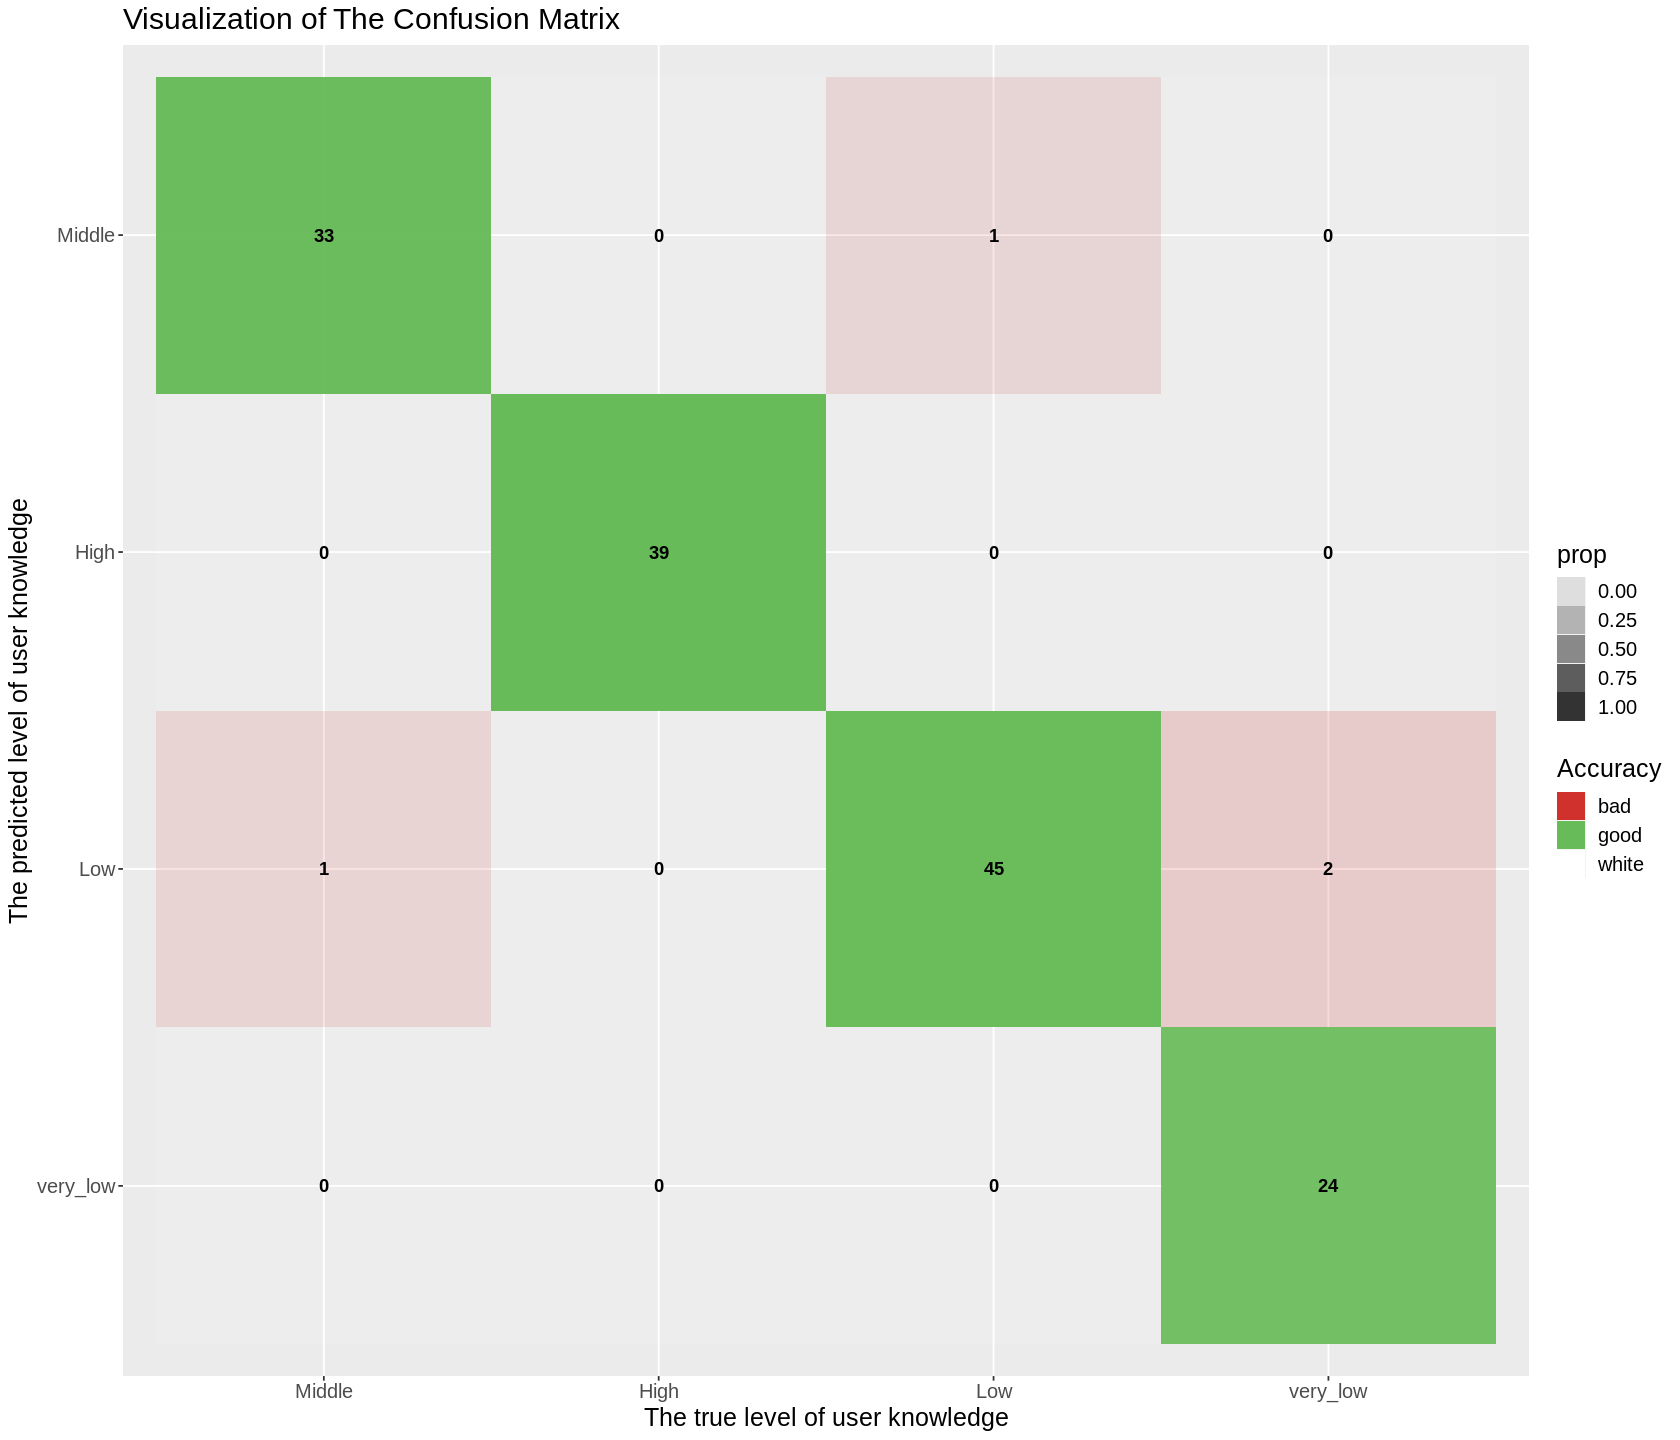

In [24]:
# Visualize the confusion matrix
table <- data.frame( model_mat$table)

plotTable <- table %>%
mutate(has_result= ifelse(table$Freq == "0","no","yes")) %>%
mutate(goodbad=ifelse(Prediction == Truth, "good", ifelse(has_result == "no", "white", "bad")))%>%
  group_by(Truth) %>%
  mutate(prop = Freq/sum(Freq))
plotTable

# Fill alpha relative to sensitivity/specificity by proportional outcomes within reference groups (see dplyr code above as well as original confusion matrix for comparison)
ggplot(data = plotTable, mapping = aes(x = Truth, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 1) +
  scale_fill_manual(values = c(good = "#68BB59", bad = "#D0312D",white="#FFFFFF"))+
labs(x="The true level of user knowledge",y="The predicted level of user knowledge",fill="Accuracy")+
ggtitle("Visualization of The Confusion Matrix")+
  xlim(rev(levels(table$Truth))) +
  theme(text = element_text(size = 15))
ggplot

**Figure 7:** A visualization of the confusion matrix. See the provided legend for details.

## **<u>DISCUSSION</u>**

### **Summarizing our findings**

We used KNN (classification) to model and analyze factors that impact user knowledge. Through use of the User Knowledge dataset (Kahraman et al., 2013), we determined that the attributes PEG and LPR most accurately predict knowledge levels of users.

We used our best K of 5, as identified by our model recipe’s workflow, to train our classifier. By using this K value in our test predictions, we were able to obtain a classification accuracy of 97.06%. In visualizing our confusion matrix, it was revealed that 24, 45, 39 and 33 observations were correctly predicted as very_low, Low, High and Middle respectively. Therefore, the classifier was able to label 141 observations (24 + 45 + 39 + 33) correctly. However, we can see that the classifier made a few mistakes; specifically, it falsely classified two observations as low when they were truly very_low and one observation as low when it was truly Middle.

After considering our findings, we think the prediction error might be due to the fact that data obtained from the training data is not balanced. For this reason, we think that we may be able to improve our accuracy by re-balancing the data by function of oversampling the rare class. As we can see from Table 3, the very_low knowledge level of user only has a count of 24 observations, which means we could use upsampling to give more voting power to very_low in our KNN algorithm.

Overall, the logical flow of our proposed methods helped us understand and process our data efficiently. It is critical to note that the best K value provided by our model recipe’s workflow was influential in maximizing the accuracy of our model. While our classes could have been manipulated to be more well-balanced, our classification was quite thorough with little inaccuracy and as such, ultimately helped us answer our predictive question that we formulated when starting this project.

### **Our findings versus expected outcomes**

Our findings are aligned nicely with our expected outcomes for this project. After our preliminary exploratory data analysis, we predicted that PEG and LPR would be the most useful attributes in classification of the User Knowledge dataset (Kahraman et al., 2013) due to their strong relationship indicated by a clear correlation. 

After performing our data analysis and following through with our classification, it is evident that PEG and LPR were able to most accurately predict knowledge levels of users. To this extent, we were not surprised by any of our findings. If anything, it was at first thought-provoking that our classification accuracy was so high (>95%). While we might have been suspicious of this result for another dataset, the User Knowledge dataset (Kahraman et al., 2013) presents its data points in distinct cluster formations that allow for straightforward predictions, as there are clear trends to be used as guidelines.

### **Impact of our findings**

In the modern day, students face many pressures related to achieving high academic grades. While we cannot evaluate principles of study for efficient learning with negligence of other factors such as subject studied, home or college circumstances, ability, personality and health (Cooper & Foy, 1969), our project highlights the attributes that have the highest potential for increasing user knowledge, PEG and LPR. Since PEG and LPR are both related to user exam performance, our findings will place importance on maximizing user exam grades. 

By understanding that trends indicate higher exam grades are correlated with higher user knowledge, educators can adapt their teaching strategies to meet learning needs more effectively and subsequently increase the number of students that are able to academically perform well. This will involve strengthening user study strategies.

It is important to note that pre-existing literature does not fill the knowledge gap on supplemental instruction and tutoring in which selection bias is reduced from whether participation occurred or not to the extent of participation in programs (Carr & London, 2019). It is critical that this knowledge gap is saturated by new research because the resulting experimental data will allow analysts to identify how exactly attributes of exam performance, such as study strategies, correlate to exam performance, if at all. 

Another imperative discussion point regarding user knowledge is that when conclusions are made, it must be understood that attributes of any larger category are not mutually exclusive when applied to real life circumstances. The user knowledge research field demands that all factors relevant to each individual person (or observation in the context of data science) are considered or accounted for in data analysis processes.

### **Future questions for further research**

Our findings will act as the foundation for further research into how user knowledge can be increased by maximizing user exam grades. This further research will hopefully give students insight as to tangible actions they can take to positively contribute to their achievement of high academic grades.

The outcomes derived from our findings pose the following questions:

1.	How is exam performance exactly impacted by its own attributes?
2.	With strengthened study strategies, can we expect user exam grades to improve at a specific rate?
3.	Can class distribution help us consider outliers (eg. a student that studies well and receives a bad grade or one that doesn’t study well and receives a good grade) in further modeling and research?

## **<u>REFERENCES</u>**

1. Balzer Carr, B., & London, R. A. (2019). The Role of Learning Support Services in University Students’ Educational Outcomes. Journal of College Student Retention: Research, Theory & Practice, 21(1), 78–104. https://doi.org/10.1177/1521025117690159
2. Cooper, B., & Foy, J.M. (1969). Students’ study habits, attitudes and academic attainment. Higher Education Quarterly, 23, 203-212.
3. H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.
4. Kahraman, H. T. (2009). Designing and Application of Web-Based Adaptive Intelligent Education System. Gazi University Ph. D. Thesis, Turkey, 1-156.
5. Liao, Xiaoqun & Nazir, Shah & Zhou, Yangbin & Shafiq, Muhammad & Qi, Xuelin. (2021). User Knowledge, Data Modelling, and Visualization: Handling through the Fuzzy Logic-Based Approach. Complexity. 2021. 1-14 https://doi.org/10.1155/2021/6629086